# Desicion Tree For Mushroom Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
mushroom_df = pd.read_csv('mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

describe the dataframe and get overall information 

In [3]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From the describe function we can check the overview of the unique values for each column, the top feature of the column and how frequently it appears. Our target feature <b>Class</b> only has two unique features.

In [5]:
mushroom_df.shape

(8124, 23)

##### Check for any null values in the dataset

In [6]:
mushroom_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

The dataset does not contain any null values

##### Check for any duplicate values in the dataset

In [7]:
mushroom_df.duplicated().sum()

0

There are zero duplicated values 

## Visualization

Let us plot the distribution of the target column 

Text(0.5, 1.0, 'distribution of edible and poisonous mushrooms')

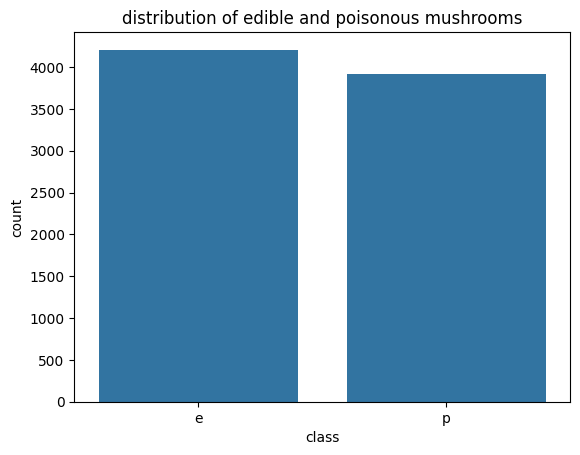

In [8]:
class_counts = mushroom_df['class'].value_counts()
sns.barplot(class_counts)
plt.title('distribution of edible and poisonous mushrooms')

## Data Manipulation

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
for column in mushroom_df.columns:
    mushroom_df[column] = label_encoder.fit_transform(mushroom_df[column])

In [11]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### correlation

In [12]:
correlation_matrix = mushroom_df.corr()

<b>veil-type   </b> has no correlation with any of the data so we drop it

In [13]:
mushroom_df.drop(['veil-type'], axis=1, inplace=True) 

In [14]:
correlation_matrix = mushroom_df.corr()

Visualize correlation

<Axes: >

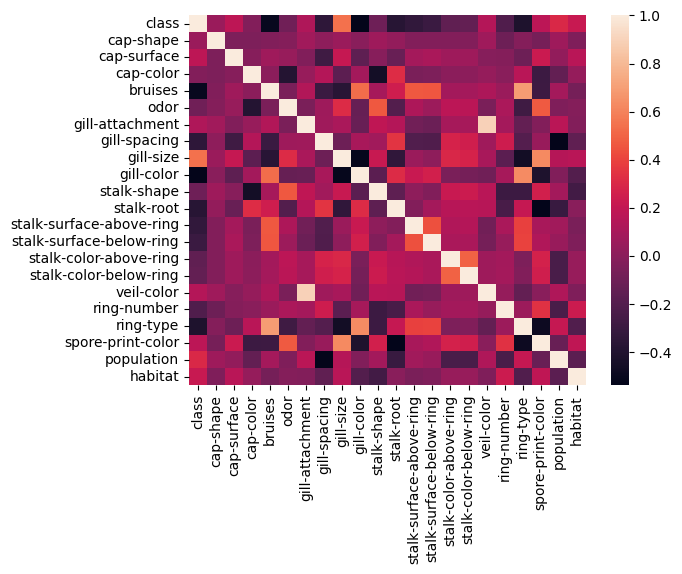

In [15]:
sns.heatmap(correlation_matrix)

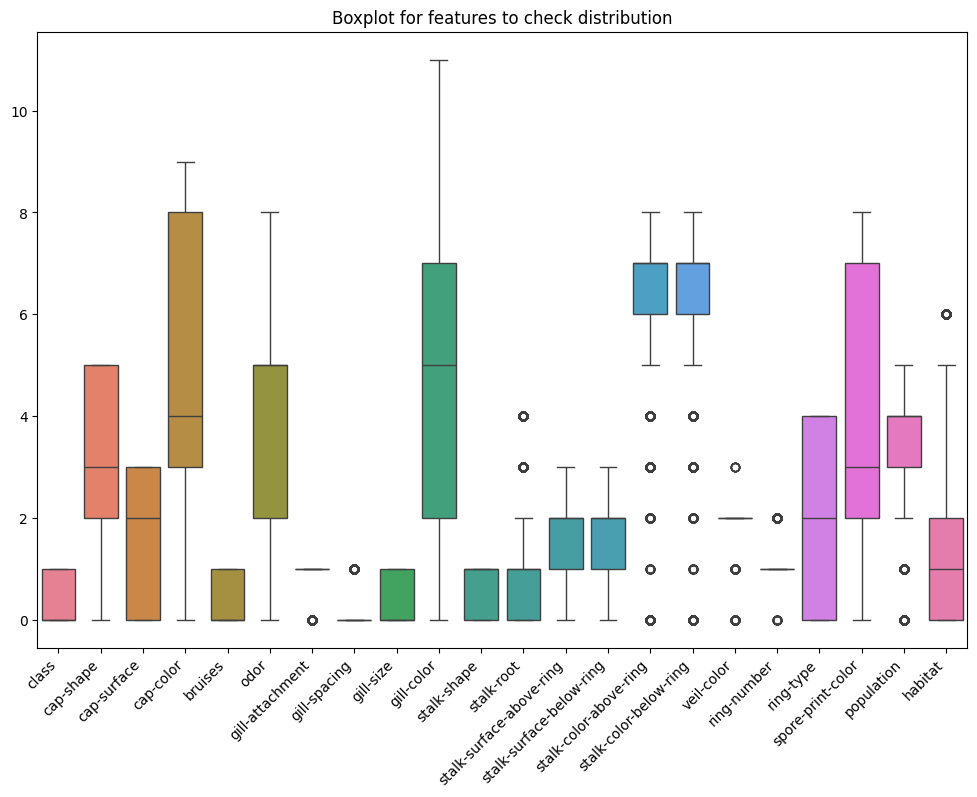

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=mushroom_df)
plt.title('Boxplot for features to check distribution')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Modelling

#### Select independent and dependant features

Independent features

In [17]:
X = mushroom_df.drop(['class'], axis=1)

dependant/target feature

In [18]:
y = mushroom_df['class']

#### split the data into train and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

##### scale the dataset

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

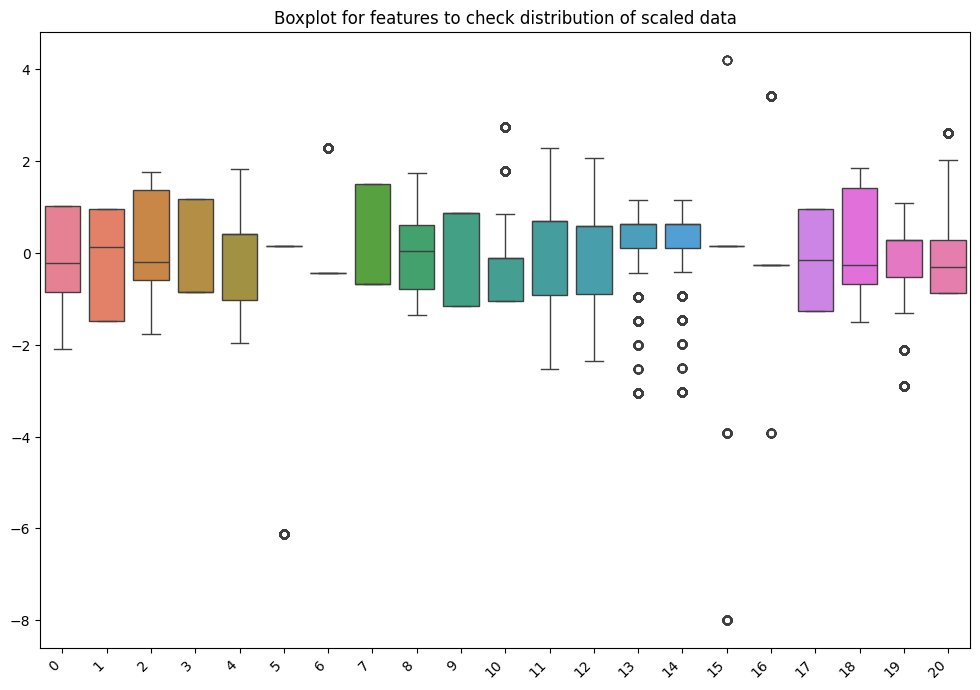

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train)
plt.title('Boxplot for features to check distribution of scaled data')
plt.xticks(rotation=45, ha='right') 
plt.show()

After scaling the data distribution for all the features has an almost central median

#### Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)

In [26]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

## Performance Metrics

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

In [28]:
y_predict = tree_classifier.predict(X_test)

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



The model has a 100% accuracy

[[433   0]
 [  0 380]]


<Axes: >

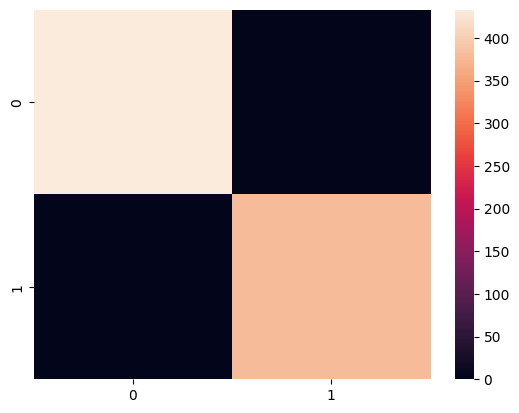

In [30]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)
sns.heatmap(conf_matrix)

In [31]:
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

print( {
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE
})

{'MAE': 0.0, 'MSE': 0.0, 'RMSE': 0.0}


The model produces zero errors

## Print Model Tree

In [32]:
from sklearn import tree

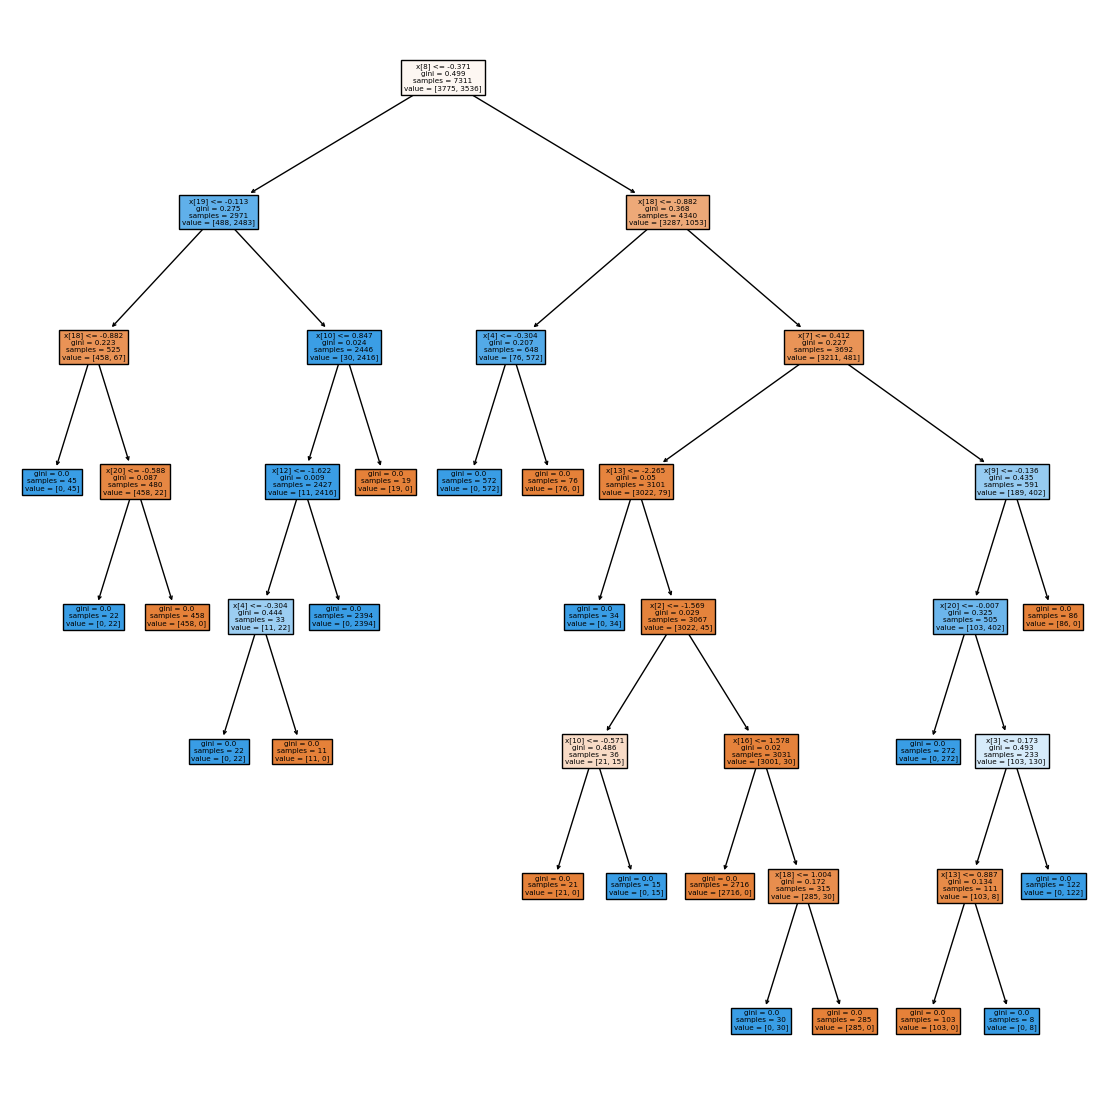

In [33]:
plt.figure(figsize=(14,14))
tree.plot_tree(tree_classifier.fit(X_train, y_train), filled=True)
plt.show()